In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Fuel_Consumption.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [7]:
# columns
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [9]:
# selecting the features for submission 
org_data = data
data = data[['ENGINESIZE', 'CO2EMISSIONS']]
data.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


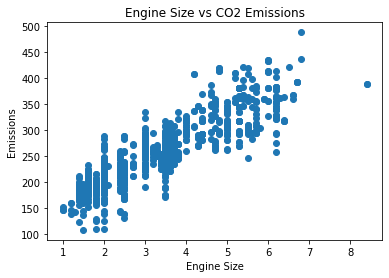

In [13]:
# Creating scatter plot
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

In [16]:
# Dividing Data into train (80%) and test (20%) sets
num = int(len(data) *.8)

train = data[:num]
test = data[num:]

print(f"Total Data Points: {len(data)}")
print(f"Train Data Points: {len(train)}")
print(f"Test Data Points: {len(test)}")
# print(f"Train + Test: {len(train)+len(test)}")

Total Data Points: 1067
Train Data Points: 853
Test Data Points: 214


In [17]:
def simple_linear_regression(input_feature, output):
    xi = input_feature
    yi = output
    
    n = len(xi)                     # Total number of data points
    xi_mean = xi.mean()             # x bar
    yi_mean = yi.mean()             # y bar
    
    s_xi = xi.sum()                 # Sum of x
    s_yi = yi.sum()                 # Sum of y
    s_xiyi = ((xi*yi).sum()) * n    # Sum of x*y multiplied by n
    s_xi_s_yi = s_xi * s_yi         # Sum of x * Sum of y
    s_xixi = ((xi * xi).sum()) * n  # Sum of (x*x) multiplied by n
    s_xi_square = s_xi * s_xi       # Square of sum of x
    
    slope = (s_xiyi - s_xi_s_yi) / (s_xixi - s_xi_square)
    intercept = yi_mean - slope * xi_mean
    
    return slope, intercept

Slope : 1.0
Intercept : 0.0


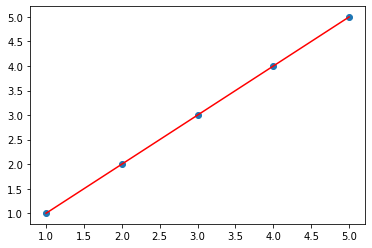

In [19]:
# checking function 
check_input = np.array((1,2,3,4,5))
check_output = np.array((1,2,3,4,5))

check_slope, check_intercept = simple_linear_regression(check_input, check_output)
print(f"Slope : {check_slope}")
print(f"Intercept : {check_intercept}")

# Expected result: slope = 1 and intercept = 0

# plot check data
plt.scatter(check_input, check_output)
plt.plot(check_input, check_output, color="red")
plt.show()

In [20]:
# Finding the slope and intercept of our training data

train_slope, train_intercept = simple_linear_regression(train['ENGINESIZE'], train['CO2EMISSIONS'])

print(f"Slope : {train_slope}")
print(f"Intercept : {train_intercept}")

Slope : 38.79512383605654
Intercept : 127.16989950881938


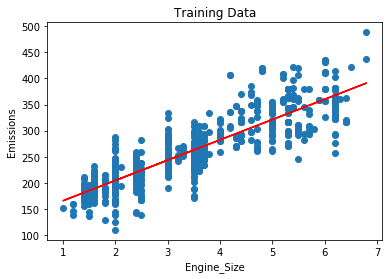

In [35]:
# Plotting training data with regression line
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'])

# below is plotting (x , y) - x is x and y=mx+b
plt.plot(train['ENGINESIZE'], train_slope * train['ENGINESIZE'] + train_intercept, color='red')
plt.title("Training Data")
plt.xlabel("Engine_Size")
plt.ylabel("Emissions")
plt.show()

In [28]:
# Prediction function - use the equation for the regression line as the prediction
 
def get_regression_prediction(input_features, slope, intercept):
    predicted_value = slope * input_features + intercept
    return predicted_value

In [29]:
# Predicting value based on prediction function

my_engine_size = 5

estimated_emission = get_regression_prediction(my_engine_size, train_slope, train_intercept)
print(f"Estimated Emission : {estimated_emission}")

Estimated Emission : 321.1455186891021


In [30]:
# Predicting values for the whole data set

y_pred = get_regression_prediction(data['ENGINESIZE'], train_slope, train_intercept)
y_pred

0       204.760147
1       220.278197
2       185.362585
3       262.952833
4       262.952833
           ...    
1062    243.555271
1063    251.314296
1064    243.555271
1065    251.314296
1066    251.314296
Name: ENGINESIZE, Length: 1067, dtype: float64

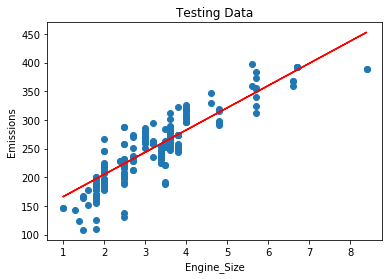

In [33]:
# Plotting testing data with regression line
plt.scatter(test['ENGINESIZE'], test['CO2EMISSIONS'])

# below is plotting (x , y) - x is x and y=mx+b
plt.plot(test['ENGINESIZE'], train_slope * test['ENGINESIZE'] + train_intercept, color='red')
plt.title("Testing Data")
plt.xlabel("Engine_Size")
plt.ylabel("Emissions")
plt.show()

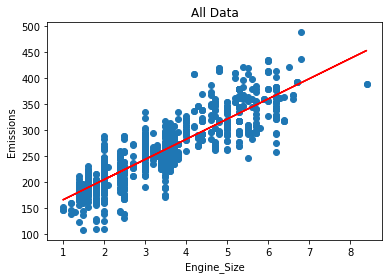

In [34]:
# Plotting ALL data with regression line
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'])

# below is plotting (x , y) - x is x and y=mx+b
plt.plot(data['ENGINESIZE'], train_slope * data['ENGINESIZE'] + train_intercept, color='red')
plt.title("All Data")
plt.xlabel("Engine_Size")
plt.ylabel("Emissions")
plt.show()

In [36]:
# Create dataframe with 2 columns: Predicted and Actual
a_p_data = pd.DataFrame({'actual' : data['CO2EMISSIONS'], 'predicted' : y_pred})
a_p_data.head()

,actual,predicted
0,196,204.760147
1,221,220.278197
2,136,185.362585
3,255,262.952833
4,244,262.952833


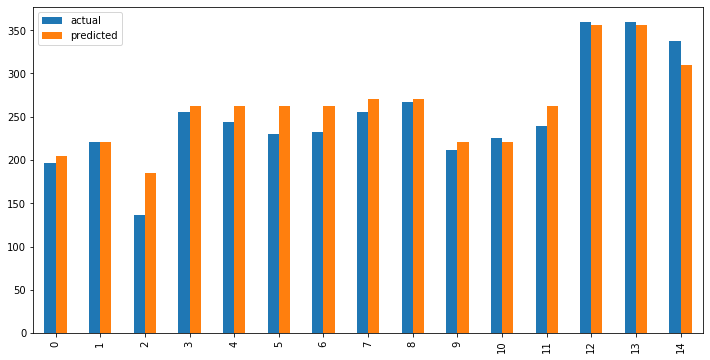

In [38]:
# Bar graph: Actual vs. Predicted
a_p_data.head(15).plot(kind='bar', figsize=(12,6))
plt.show()

In [40]:
# Error Calculation using Residual Sum of Squares
def residual_sum_of_squares(input_feature, output, slope, intercept):
    prediction = slope * input_feature + intercept
    residual = output - prediction
    rss = (residual**2).sum()
    return rss

In [41]:
# Residual Sum of Squares Error: Test Set
test_rss = residual_sum_of_squares(test['ENGINESIZE'], test['CO2EMISSIONS'], train_slope, train_intercept)

print(test_rss)

159741.10295932175


In [71]:
## Additional work - finding percetage of accuracy
diff_a_p_data = a_p_data.copy()
diff_a_p_data['diff'] = abs(a_p_data['actual'] - a_p_data['predicted']) 
diff_a_p_data['percent_diff'] =  diff_a_p_data['diff'] / a_p_data['actual']

print(f"Percent Difference : {round(diff_a_p_data['percent_diff'].mean() * 100,2)}%")

Percent Difference : 9.49%
